In [78]:
import pandas as pd

# Leer el archivo CSV y eliminar filas con valores faltantes (NA)
data = pd.read_csv('nuevo_acumulado_hechos_de_transito_2023_12.csv', low_memory = None).dropna()
data['fecha_evento'] = pd.to_datetime(data['fecha_evento'])
data['hora_evento'] = pd.to_datetime(data['hora_evento'])

# Filtrar los datos solo para el año 2023
data_2023 = data[data['fecha_evento'].dt.year == 2023]

# Seleccionar las columnas de interés
selected_columns = ['personas_fallecidas', 'personas_lesionadas']

# medidas de tendencia central y dispersión
summary_stats = data_2023[selected_columns].describe()

# asimetría
skewness = data_2023[selected_columns].skew()
# Agregar la medida de asimetría al resumen estadístico
summary_stats.loc['skewness'] = skewness

# resumen
print(summary_stats)



/tmp/ipykernel_35250/1215097429.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['hora_evento'] = pd.to_datetime(data['hora_evento'])


          personas_fallecidas  personas_lesionadas
count            19011.000000         19011.000000
mean                 0.014097             1.170217
std                  0.123132             0.607388
min                  0.000000             0.000000
25%                  0.000000             1.000000
50%                  0.000000             1.000000
75%                  0.000000             1.000000
max                  4.000000            21.000000
skewness             9.912642             7.361574


In [54]:
# Convertir la columna de fecha_evento a tipo de dato datetime
data['fecha_evento'] = pd.to_datetime(data['fecha_evento']) 

# Extraer el día de la semana y la hora del día de cada evento
data['dia_semana'] = data['fecha_evento'].dt.day_name()#Para evitar el problema del día, usamos las columnas fechas y evitamos ese
data['hora'] = data['fecha_evento'].dt.hour #posible error de captura 

# Realizar conteo de accidentes por día de la semana y hora del día
accidentes_por_dia_semana = data['dia_semana'].value_counts()
accidentes_por_hora = data['hora'].value_counts()

# Mostrar tabla de resumen por día de la semana
print("Accidentes por día de la semana:")
print(accidentes_por_dia_semana)

# Mostrar tabla de resumen por hora del día
print("\nAccidentes por hora del día:")
print(accidentes_por_hora)


Accidentes por día de la semana:
dia_semana
Saturday     6772
Friday       6363
Sunday       6020
Thursday     5832
Wednesday    5744
Tuesday      5569
Monday       5569
Name: count, dtype: int64

Accidentes por hora del día:
hora
0    41869
Name: count, dtype: int64


In [64]:
conteo_eventos = data['tipo_evento'].value_counts()
print(conteo_eventos)

tipo_evento
CHOQUE               76907
DERRAPADO            24940
ATROPELLADO          24844
CAIDA DE CICLISTA     3151
VOLCADURA             2296
CAIDA DE PASAJERO     1941
Name: count, dtype: int64


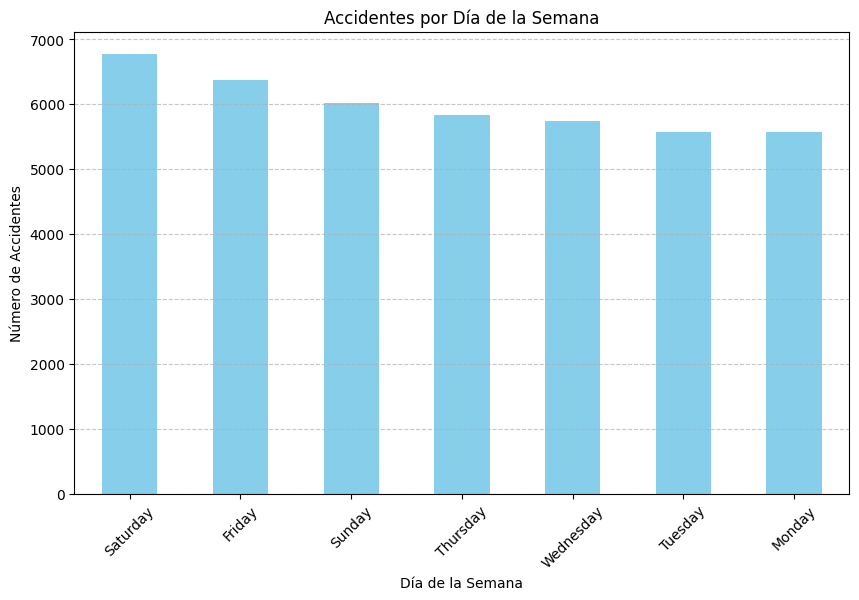

In [55]:
# Gráfico de accidentes por día de la semana
plt.figure(figsize=(10, 6))
accidentes_por_dia_semana.plot(kind='bar', color='skyblue')
plt.title('Accidentes por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()





/tmp/ipykernel_35250/3998123107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023['dia_semana'] = data_2023['fecha_evento'].dt.day_name()


<Figure size 1000x600 with 0 Axes>

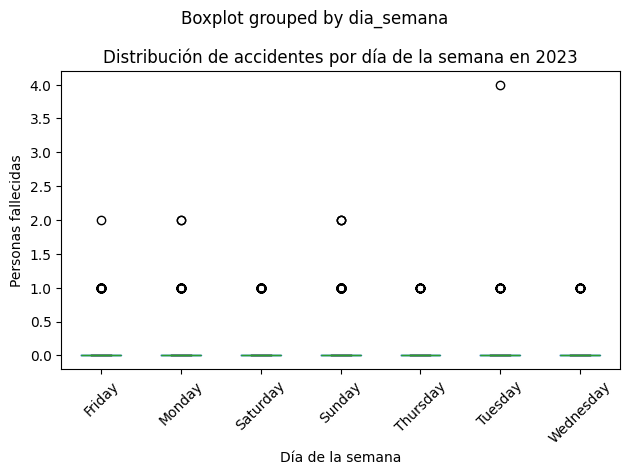

In [80]:
# Obtener el día de la semana
data_2023['dia_semana'] = data_2023['fecha_evento'].dt.day_name()

# Crear el boxplot
plt.figure(figsize=(10, 6))
data_2023.boxplot(column='personas_fallecidas', by='dia_semana', grid=False)
plt.title('Distribución de accidentes por día de la semana en 2023')
plt.xlabel('Día de la semana')
plt.ylabel('Personas fallecidas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


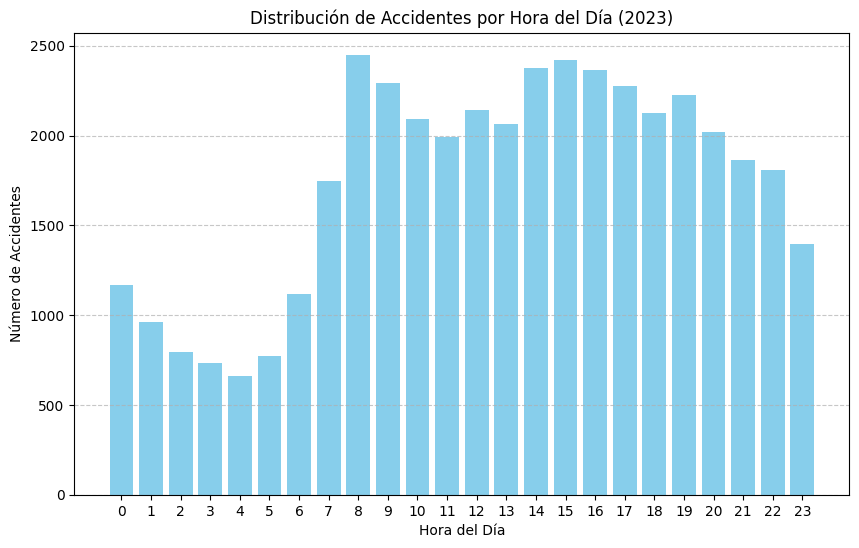

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV y eliminar filas con valores faltantes
data = pd.read_csv('nuevo_acumulado_hechos_de_transito_2023_12.csv', low_memory=False).dropna()

# Convertir la columna 'hora_evento' a tipo de dato datetime
data['hora_evento'] = pd.to_datetime(data['hora_evento'], format='%H:%M:%S', errors='coerce')

# Eliminar filas con valores NaT después de la conversión
data = data.dropna(subset=['hora_evento'])

# Extraer la hora de cada evento
data['hora'] = data['hora_evento'].dt.hour

# Realizar un conteo de las horas en las que ocurren los accidentes
conteo_horas = data['hora'].value_counts().sort_index()

# Visualizar la distribución de las horas utilizando un histograma
plt.figure(figsize=(10, 6))
plt.bar(conteo_horas.index, conteo_horas.values, color='skyblue')
plt.title('Distribución de Accidentes por Hora del Día (2023)')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Accidentes')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [57]:
##Prueba con shapiro 

In [58]:

import pandas as pd
from scipy.stats import shapiro

# Cargar los datos desde el CSV
data = pd.read_csv('nuevo_acumulado_hechos_de_transito_2023_12.csv')


data_2023 = data[data['fecha_evento'].str.contains('2023')]


sample_data = data_2023.sample(n=5000, random_state=42)


statistic, p_value = shapiro(sample_data['personas_lesionadas'])


print("Shapiro-Wilk Test (5000 datos del año 2023):")
print(f"Estadístico: {statistic}")
print(f"Valor p: {p_value}")


alpha = 0.05
if p_value > alpha:
    print("Los datos siguen una distribución normal (no se puede rechazar la hipótesis nula)")
else:
    print("Los datos no siguen una distribución normal (se rechaza la hipótesis nula)")


Shapiro-Wilk Test (5000 datos del año 2023):
Estadístico: 0.3987145343941698
Valor p: 3.4532946662750667e-84
Los datos no siguen una distribución normal (se rechaza la hipótesis nula)


/tmp/ipykernel_35250/1493323775.py:5: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('nuevo_acumulado_hechos_de_transito_2023_12.csv')


In [59]:
import pandas as pd
from scipy.stats import shapiro

# Cargar los datos desde el CSV
data = pd.read_csv('nuevo_acumulado_hechos_de_transito_2023_12.csv')

# Filtrar los datos para obtener solo los del año 2023
data_2023 = data[data['fecha_evento'].str.contains('2023')]

# Tomar una muestra aleatoria de 5000 datos
sample_data = data_2023.sample(n=5000, random_state=42)

# Realizar la prueba de Shapiro-Wilk
statistic, p_value = shapiro(sample_data['personas_fallecidas'])

# Imprimir los resultados
print("Shapiro-Wilk Test (5000 datos del año 2023):")
print(f"Estadístico: {statistic}")
print(f"Valor p: {p_value}")

# Interpretar los resultados
alpha = 0.05
if p_value > alpha:
    print("Los datos siguen una distribución normal (no se puede rechazar la hipótesis nula)")
else:
    print("Los datos no siguen una distribución normal (se rechaza la hipótesis nula)")


Shapiro-Wilk Test (5000 datos del año 2023):
Estadístico: 0.11532835051157275
Valor p: 5.679479164012434e-93
Los datos no siguen una distribución normal (se rechaza la hipótesis nula)


/tmp/ipykernel_35250/3907758200.py:5: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('nuevo_acumulado_hechos_de_transito_2023_12.csv')


In [60]:
## Transformaciones

In [61]:
'''import numpy as np

# Aplicar transformación logarítmica a los datos
transformed_data = np.log(data)

# Realizar la prueba de normalidad en los datos transformados
statistic, p_value = shapiro(transformed_data)

# Imprimir los resultados
print("Shapiro-Wilk Test (datos transformados):")
print(f"Estadístico: {statistic}")
print(f"Valor p: {p_value}")

# Interpretar los resultados
alpha = 0.05
if p_value > alpha:
    print("Los datos transformados siguen una distribución normal (no se puede rechazar la hipótesis nula)")
else:
    print("Los datos transformados no siguen una distribución normal (se rechaza la hipótesis nula)")'''


'import numpy as np\n\n# Aplicar transformación logarítmica a los datos\ntransformed_data = np.log(data)\n\n# Realizar la prueba de normalidad en los datos transformados\nstatistic, p_value = shapiro(transformed_data)\n\n# Imprimir los resultados\nprint("Shapiro-Wilk Test (datos transformados):")\nprint(f"Estadístico: {statistic}")\nprint(f"Valor p: {p_value}")\n\n# Interpretar los resultados\nalpha = 0.05\nif p_value > alpha:\n    print("Los datos transformados siguen una distribución normal (no se puede rechazar la hipótesis nula)")\nelse:\n    print("Los datos transformados no siguen una distribución normal (se rechaza la hipótesis nula)")'

In [62]:
## No se logró porque hay cero presente, así que ni siquiera trataré con la otra variable. Usaré Cox Box

In [85]:
from scipy.stats import boxcox, shapiro

# Filtrar los datos para quedarnos solo con los del año 2023
data_2023 = data[data['fecha_evento'].dt.year == 2023]


transformed_data, lambda_value = boxcox(data_2023['personas_fallecidas'] + 1)  # Sumamos 1 para evitar valores de 0


print("Valor óptimo de lambda:", lambda_value)


statistic, p_value = shapiro(transformed_data)


print("\nShapiro-Wilk Test para datos transformados:")
print(f"Estadístico: {statistic}")
print(f"Valor p: {p_value}")

alpha = 0.05
if p_value > alpha:
    print("Los datos transformados siguen una distribución normal (no se puede rechazar la hipótesis nula)")
else:
    print("Los datos transformados no siguen una distribución normal (se rechaza la hipótesis nula)")



Valor óptimo de lambda: -103.95671281849637

Shapiro-Wilk Test para datos transformados:
Estadístico: 0.09040788201943539
Valor p: 1.436525538448839e-131
Los datos transformados no siguen una distribución normal (se rechaza la hipótesis nula)


/tmp/ipykernel_35250/3881463491.py:13: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19011.
  statistic, p_value = shapiro(transformed_data)


In [ ]:
from scipy.stats import shapiro

# Realizar la prueba de Shapiro-Wilk en los datos transformados
statistic, p_value = shapiro(transformed_data)

# Imprimir los resultados
print("Shapiro-Wilk Test:")
print(f"Estadístico: {statistic}")
print(f"Valor p: {p_value}")

# Interpretar los resultados
alpha = 0.05
if p_value > alpha:
    print("Los datos transformados siguen una distribución normal (no se puede rechazar la hipótesis nula)")
else:
    print("Los datos transformados no siguen una distribución normal (se rechaza la hipótesis nula)")


In [ ]:
#Correlación

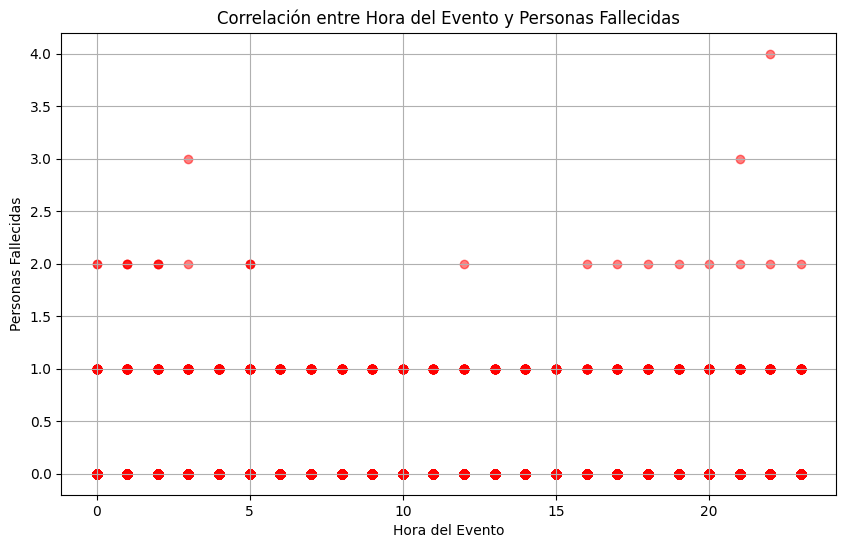

Coeficiente de Correlación de Pearson entre la Hora del Día y la Cantidad de Accidentes: 0.6226260852486605


In [87]:

import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV y eliminar filas con valores faltantes
data = pd.read_csv('nuevo_acumulado_hechos_de_transito_2023_12.csv', low_memory=False).dropna()

# Convertir la columna 'hora_evento' a tipo de dato datetime
data['hora_evento'] = pd.to_datetime(data['hora_evento'], format='%H:%M:%S', errors='coerce')

# Calcular la correlación entre la hora del evento y el número de personas fallecidas
correlation = data['hora_evento'].dt.hour.corr(data['personas_fallecidas'])

# Graficar los datos en un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(data['hora_evento'].dt.hour, data['personas_fallecidas'], color='red', alpha=0.5)
plt.title('Correlación entre Hora del Evento y Personas Fallecidas')
plt.xlabel('Hora del Evento')
plt.ylabel('Personas Fallecidas')
plt.grid(True)
plt.show()
# Calcular el coeficiente de correlación entre la hora del día y la cantidad de accidentes
correlacion_horas = conteo_horas.corr(pd.Series(range(24)))

# Imprimir el coeficiente de correlación
print(f"Coeficiente de Correlación de Pearson entre la Hora del Día y la Cantidad de Accidentes: {correlacion_horas}")



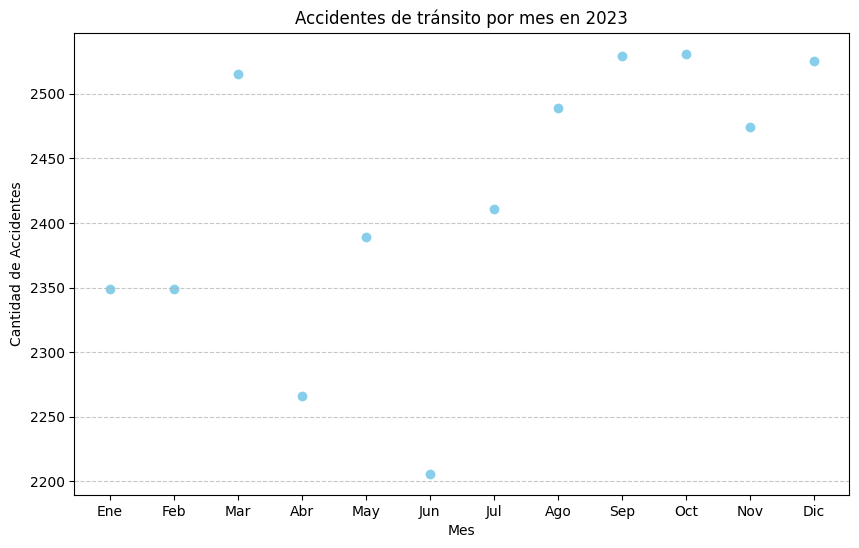

Coeficiente de Correlación de Pearson: 0.5733975095867174


In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV y filtrar los datos del año 2023
data = pd.read_csv('nuevo_acumulado_hechos_de_transito_2023_12.csv', low_memory=False)
data['fecha_evento'] = pd.to_datetime(data['fecha_evento'])
data_2023 = data[data['fecha_evento'].dt.year == 2023]

# Conteo de accidentes por mes
accidentes_por_mes = data_2023['fecha_evento'].dt.month.value_counts().sort_index()

# Crear un DataFrame con los datos del conteo
df_accidentes_mes = pd.DataFrame({'Mes': accidentes_por_mes.index, 'Accidentes': accidentes_por_mes.values})

# Generar el gráfico de puntos
plt.figure(figsize=(10, 6))
plt.scatter(df_accidentes_mes['Mes'], df_accidentes_mes['Accidentes'], color='skyblue')
plt.title('Accidentes de tránsito por mes en 2023')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Calcular el coeficiente de correlación
correlacion = df_accidentes_mes['Mes'].corr(df_accidentes_mes['Accidentes'])

# Imprimir el coeficiente de correlación
print(f"Coeficiente de Correlación de Pearson: {correlacion}")


In [ ]:
#E.N.P 

In [81]:
from scipy.stats import mannwhitneyu

# Supongamos que tienes dos muestras llamadas sample1 y sample2



ValueError: Array shapes are incompatible for broadcasting.

In [83]:
import numpy as np
from scipy.stats import mannwhitneyu, wilcoxon, kruskal, friedmanchisquare

# Suponiendo que tienes un DataFrame llamado 'data' que contiene tus datos
# Y que las columnas son 'personas_fallecidas' y 'personas_lesionadas'

# Extraer las columnas de interés y convertirlas en arrays numpy
sample1 = data['personas_fallecidas'].to_numpy()
sample2 = data['personas_lesionadas'].to_numpy()

# Mann-Whitney U test
u_statistic, p_value_mw = mannwhitneyu(sample1, sample2)
print("Mann-Whitney U test:")
print("U-statistic:", u_statistic)
print("p-value:", p_value_mw)

# Wilcoxon signed-rank test (para muestreos dependientes)
_, p_value_w = wilcoxon(sample1, sample2)
print("\nWilcoxon signed-rank test:")
print("p-value:", p_value_w)

# Kruskal-Wallis H test (para más de dos muestreos independientes)
_, p_value_kw = kruskal(sample1, sample2)
print("\nKruskal-Wallis H test:")
print("p-value:", p_value_kw)

# Friedman test (para más de dos muestreos dependientes)
_, p_value_f = friedmanchisquare(sample1, sample2)
print("\nFriedman test:")
print("p-value:", p_value_f)


Mann-Whitney U test:
U-statistic: 23128580.0
p-value: 0.0

Wilcoxon signed-rank test:
p-value: 0.0

Kruskal-Wallis H test:
p-value: 0.0


ValueError: At least 3 sets of samples must be given for Friedman test, got 2.

In [88]:
from scipy.stats import mannwhitneyu

#  Mann-Whitney personas_fallecidas y personas_lesionadas
statistic, p_value_mw = mannwhitneyu(data['personas_fallecidas'], data['personas_lesionadas'])
print("Mann-Whitney U test:")
print("p-value:", p_value_mw)


Mann-Whitney U test:
p-value: 0.0
